In [66]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from datetime import date, timedelta

Loading and preprocessing data

In [90]:
full_df_unfiltered = pd.read_csv("hf://datasets/Ammok/apple_stock_price_from_1980-2021/AAPL.csv")
full_df_unfiltered

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100178,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094952,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087983,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090160,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092774,73449600
...,...,...,...,...,...,...,...
10463,2022-06-13,132.869995,135.199997,131.440002,131.880005,131.880005,122207100
10464,2022-06-14,133.130005,133.889999,131.479996,132.759995,132.759995,84784300
10465,2022-06-15,134.289993,137.339996,132.160004,135.429993,135.429993,91533000
10466,2022-06-16,132.080002,132.389999,129.039993,130.059998,130.059998,108123900


In [91]:
df_unfiltered = full_df_unfiltered[['Date', 'High']]
df_unfiltered

,Date,High
0,1980-12-12,0.128906
1,1980-12-15,0.122210
2,1980-12-16,0.113281
3,1980-12-17,0.116071
4,1980-12-18,0.119420
...,...,...
10463,2022-06-13,135.199997
10464,2022-06-14,133.889999
10465,2022-06-15,137.339996
10466,2022-06-16,132.389999


In [154]:

# Find the earliest date
df_unfiltered['Date'] = pd.to_datetime(df_unfiltered['Date'])
earliest_date = pd.to_datetime(df_unfiltered['Date']).min()
df_unfiltered['Days_Since_Earliest'] = (df_unfiltered['Date'] - earliest_date).dt.days
df_unfiltered

C:\Users\hanna\AppData\Local\Temp\ipykernel_26972\1802945962.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unfiltered['Date'] = pd.to_datetime(df_unfiltered['Date'])
C:\Users\hanna\AppData\Local\Temp\ipykernel_26972\1802945962.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unfiltered['Days_Since_Earliest'] = (df_unfiltered['Date'] - earliest_date).dt.days


,Date,High,Days_Since_Earliest
0,1980-12-12,0.128906,0
1,1980-12-15,0.122210,3
2,1980-12-16,0.113281,4
3,1980-12-17,0.116071,5
4,1980-12-18,0.119420,6
...,...,...,...
10463,2022-06-13,135.199997,15158
10464,2022-06-14,133.889999,15159
10465,2022-06-15,137.339996,15160
10466,2022-06-16,132.389999,15161


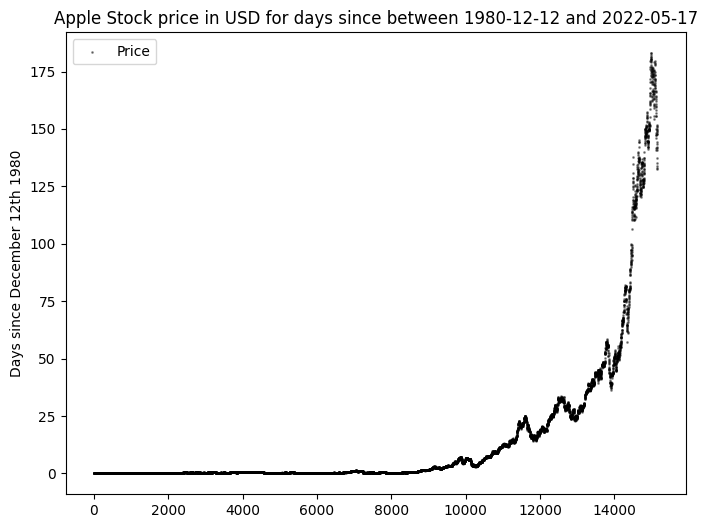

In [155]:
plt.figure(figsize=(8, 6))
plt.scatter(df_unfiltered['Days_Since_Earliest'] , df_unfiltered["High"], alpha=0.4, s = 1, label = 'Price', color ='black')

plt.ylabel('Price in usd')
plt.ylabel('Days since December 12th 1980')
plt.title('Apple Stock price in USD for days since between 1980-12-12 and 2022-05-17')
plt.legend()
plt.show()

In [156]:
def normalize(X):
    X = np.array(X)
    X = X.reshape(X.shape[0], 1).astype("float64")
    mean = np.mean(X)
    std = np.std(X)
    X -= mean
    X /= std
    return X, mean, std

def inverse_normalize(X, mean, std):
    X = np.array(X)
    X *= std
    X += mean
    return X

# Normalize the data
days_since_, days_mean, days_std = normalize(df_unfiltered['Days_Since_Earliest'])
price_on_day, price_mean, price_std = normalize(df_unfiltered["High"])

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(days_since_, price_on_day, test_size=0.1, random_state=7)

Building the model

In [172]:
# Define the model architecture
model = Sequential()
model.add(Dense(64, activation="relu", input_dim=1))
model.add(Dropout(0.25))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.25))
model.add(Dense(1))

# Define the optimizer and compile the model
sgd = SGD(learning_rate=0.01)
model.compile(loss='mean_squared_error', optimizer=sgd, metrics=['mae'])

# Train the model on the training data
model.fit(x_train, y_train, epochs=100, batch_size=500)

Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.9890 - mae: 0.5907  
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7495 - mae: 0.5039
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6427 - mae: 0.4545
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5693 - mae: 0.4335
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5280 - mae: 0.4164
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4956 - mae: 0.3924
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4438 - mae: 0.3751
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4540 - mae: 0.3745
Epoch 9/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4431 - mae: 0.3638
Epoch 10/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4207 - mae: 0.3452
Epoch 11/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4172 - mae: 0.3413
Epoch 12/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3725 - mae: 0.3163
Epoch 13/100
19/19 ━━━━━━━━━━━━━━━━

In [173]:
# Evaluate the model on the test data
score = model.evaluate(x_test, y_test, batch_size=100)
print(f"Test loss: {score[0]}, Test MAE: {score[1]}")

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0737 - mae: 0.1247  
Test loss: 0.07732345163822174, Test MAE: 0.12690283358097076


In [174]:
# Generate a range of input values for plotting
input_values = np.linspace(days_since_.min(), days_since_.max(), 1000).reshape(-1, 1)
predicted_outputs = model.predict(input_values)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


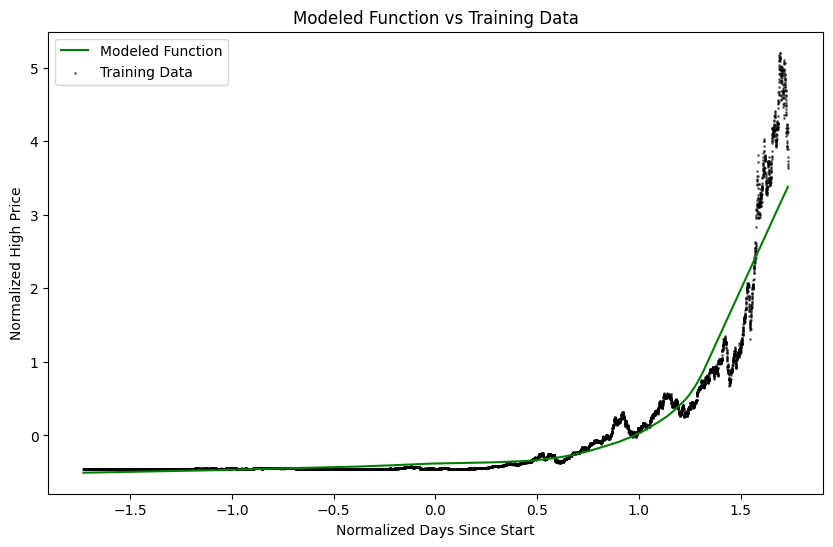

In [175]:
# Plot the function
plt.figure(figsize=(10, 6))
plt.plot(input_values, predicted_outputs, label='Modeled Function', color='green')
plt.scatter(days_since_, price_on_day, label='Training Data', color='black', alpha=0.5, s = 1)
plt.xlabel('Normalized Days Since Start')
plt.ylabel('Normalized High Price')
plt.title('Modeled Function vs Training Data')
plt.legend()
plt.show()



32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


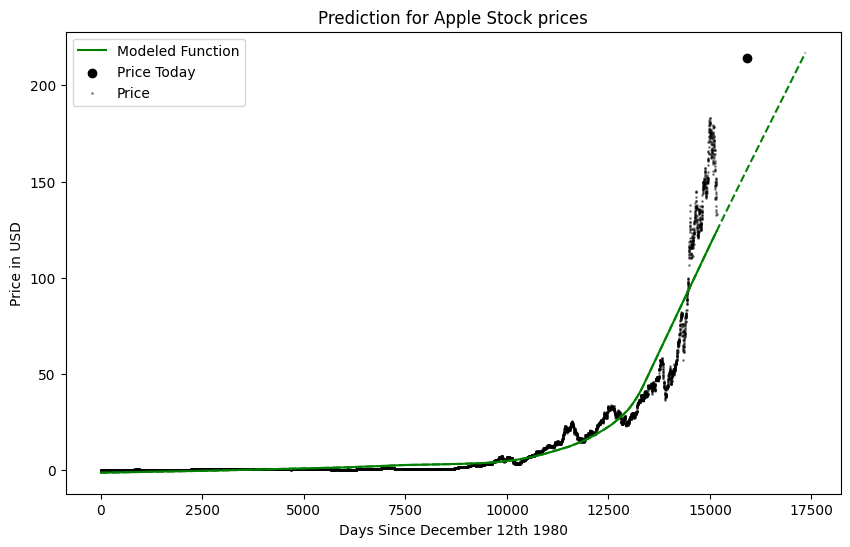

In [176]:
input_values_future = np.linspace(days_since_.min(), days_since_.max() + 0.5, 1000).reshape(-1, 1)
predicted_outputs_future = model.predict(input_values_future)


input_values_1 = inverse_normalize(input_values, days_mean, days_std)
predicted_values_1 = inverse_normalize(predicted_outputs, price_mean, price_std)
input_values_future = inverse_normalize(input_values_future, days_mean, days_std)
predicted_outputs_future = inverse_normalize(predicted_outputs_future, price_mean, price_std)

# Plot the function
plt.figure(figsize=(10, 6))
plt.plot(input_values_1, predicted_values_1, label='Modeled Function', color='green')
plt.plot(input_values_future, predicted_outputs_future, color='green', linestyle='--')

plt.scatter(15908, 214, label='Price Today', color='black')


plt.scatter(df_unfiltered['Days_Since_Earliest'] , df_unfiltered["High"], alpha=0.4, s = 1, label = 'Price', color = 'black')
plt.xlabel('Days Since December 12th 1980')
plt.ylabel('Price in USD')
plt.title('Prediction for Apple Stock prices')
plt.legend()
plt.show()

In [135]:
original_date = date(1980, 12, 12)
new_date = original_date + timedelta(days=15908)
print(new_date)

2024-07-02


(1000, 1)